# Digital Image Processing — Student Assignment Notebook
**Student name:** Joraboev Abror  
**Student ID:** 230363

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def clip_uint8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

In [9]:
import matplotlib.pyplot as plt

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img1, cmap=cmap1)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2, cmap=cmap2)
    plt.title(title2)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Image shape (H, W, C): (1500, 1500, 3) | dtype: uint8


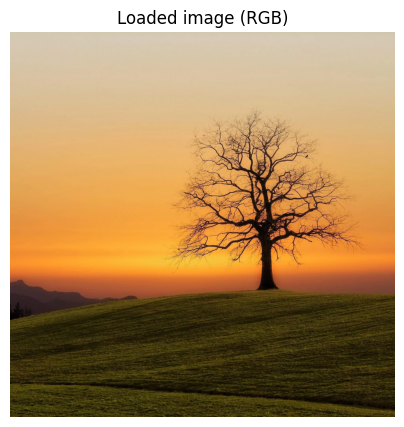

In [6]:
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = "img.png"

bgr = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
if bgr is None:
    raise FileNotFoundError(f"Image not found at: {IMAGE_PATH}")

img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()

In [7]:
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])

Top-left pixel: [208 201 178]
Center pixel: [247 158  92]


Reloaded shape: (1500, 1500, 3) | dtype: uint8


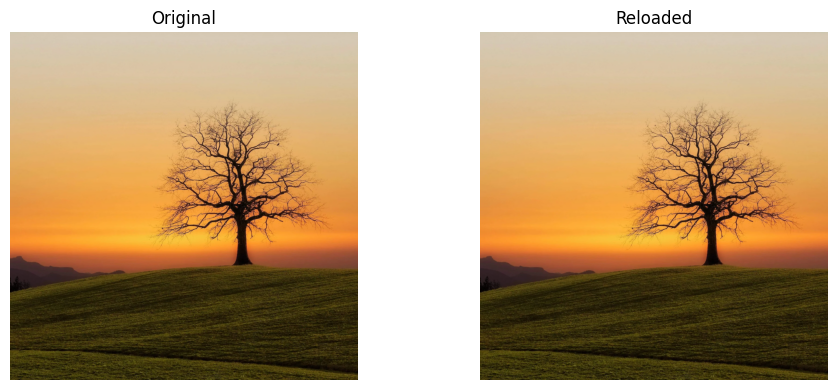

In [10]:
import cv2

out_path = "output_saved.png"

# RGB -> BGR for OpenCV saving
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")

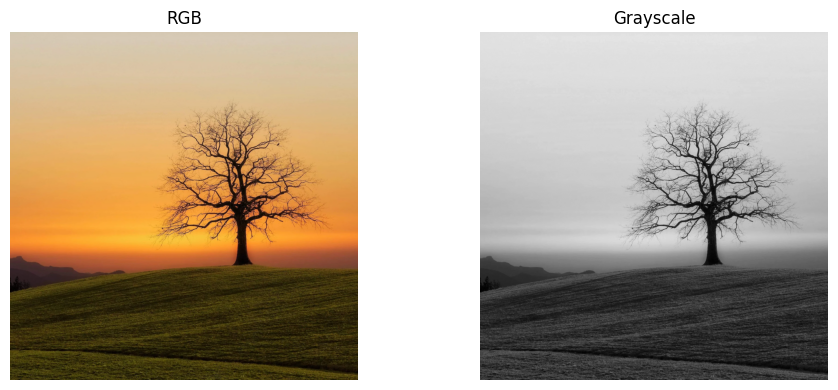

Gray shape: (1500, 1500) | dtype: uint8


In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)

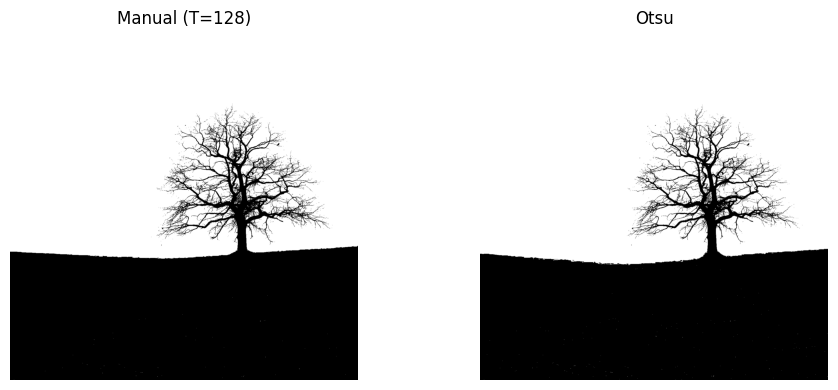

Otsu threshold chosen by OpenCV: 115.0


In [12]:
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

otsu_thresh, binary_otsu = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", otsu_thresh)

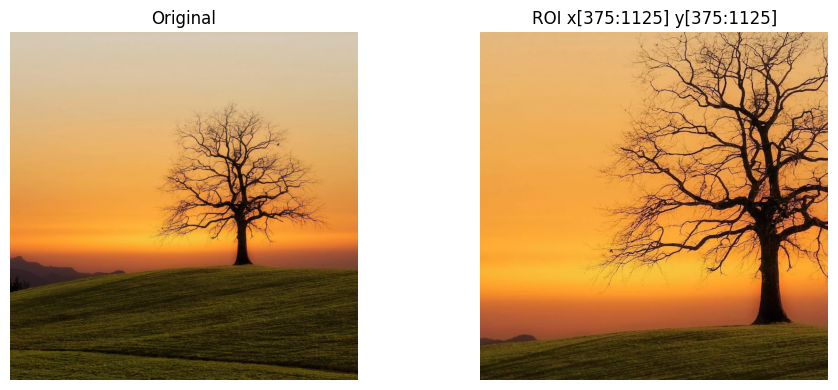

ROI shape: (750, 750, 3)


In [13]:
h, w = img.shape[:2]
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)

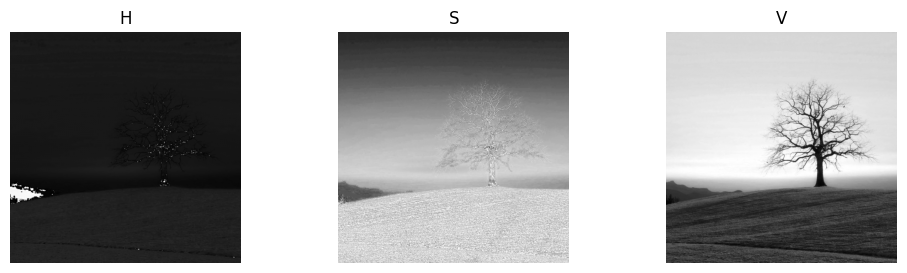

In [14]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i)
    plt.imshow(ch, cmap="gray")
    plt.title(name)
    plt.axis("off")
plt.show()

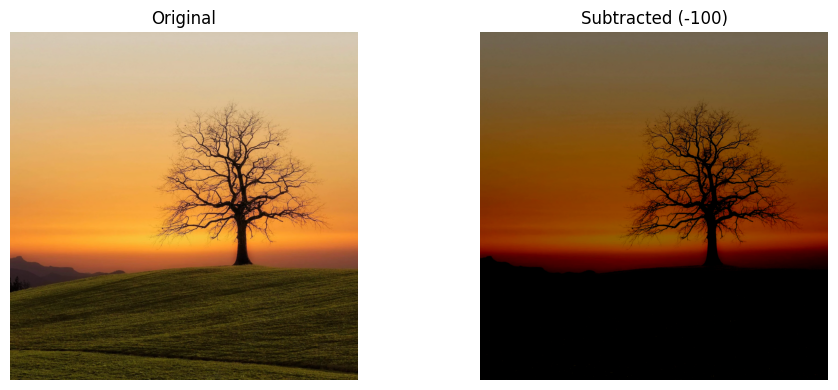

In [15]:
sub_val = 100
img_sub = cv2.subtract(img, sub_val)
show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

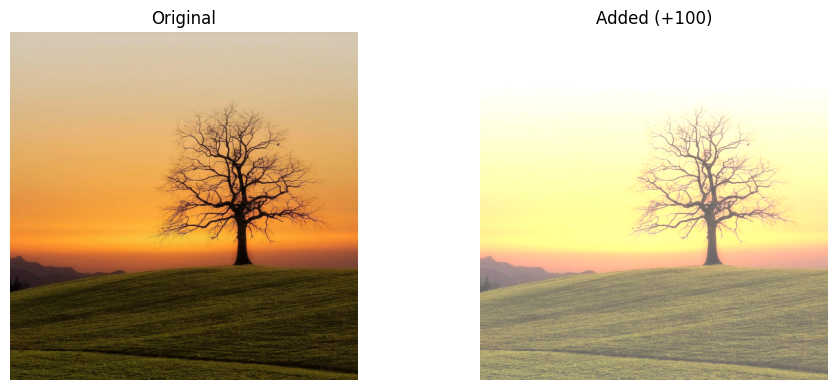

In [16]:
add_val = 100
img_add = cv2.add(img, add_val)
show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

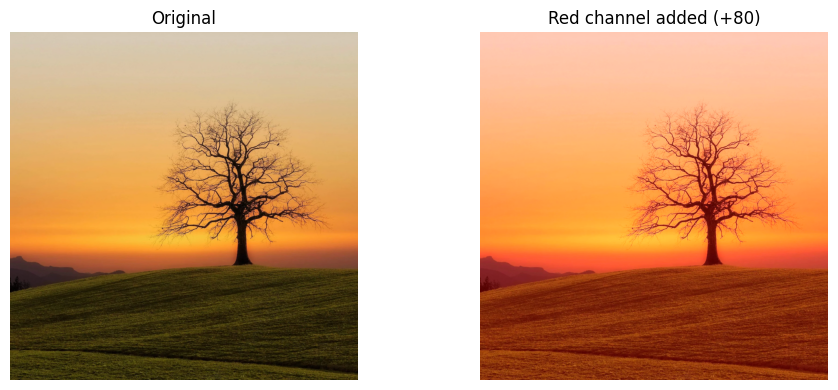

In [17]:
add_val_r = 80
img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)
show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")

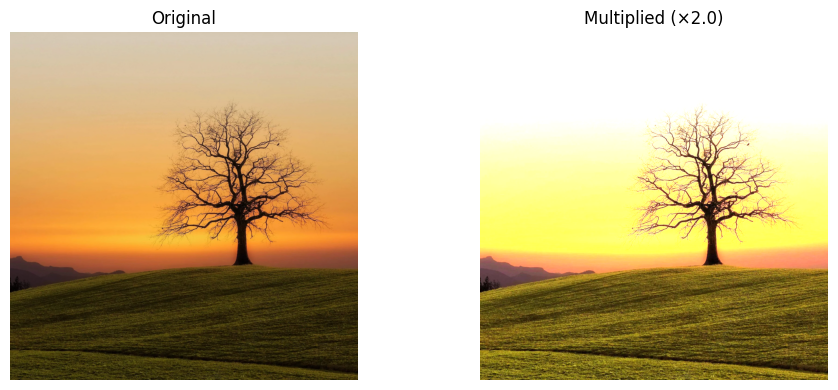

In [21]:
factor = 2.0
img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)
show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

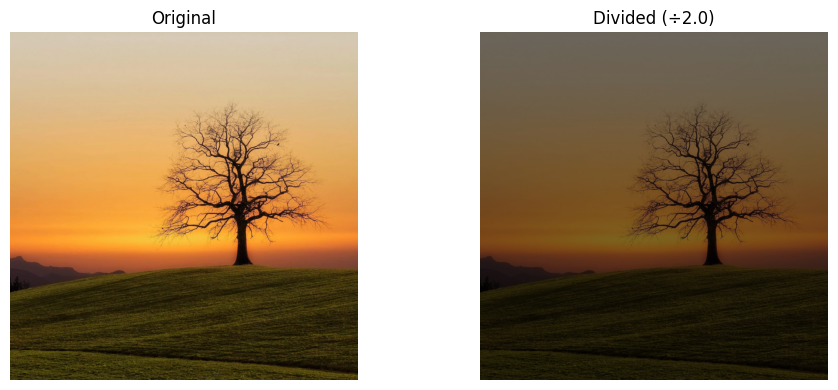

In [22]:
divisor = 2.0
img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)
show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")